### Importing Libraries

In [56]:
import numpy as np
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split 
from nltk.corpus import stopwords 
from collections import Counter
import string 

from nltk.tokenize import regexp_tokenize 

plt.style.use('seaborn-whitegrid')


In [57]:
train = pd.read_csv('train.csv') 

In [58]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


### data expolaration and analysis

In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


    it seems like it has a nan values

In [65]:
# check nan values
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [74]:
print(f'percentage of "keyword" = { (train["keyword"].isnull().sum() / len(train))*100 }')

percentage of "keyword" = 0.8012610009194797


In [75]:
print(f'percentage of "location" = {(train["location"].isnull().sum() / len(train))*100}')


percentage of "location" = 33.27203467752528


    there is a lot of nan values


In [76]:
# handling
train.dropna(inplace = True)

In [77]:
# check after handled
train.isnull().sum().any()

False

In [79]:
train

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0
...,...,...,...,...,...
7575,10826,wrecked,TN,On the bright side I wrecked http://t.co/uEa0t...,0
7577,10829,wrecked,#NewcastleuponTyne #UK,@widda16 ... He's gone. You can relax. I thoug...,0
7579,10831,wrecked,"Vancouver, Canada",Three days off from work and they've pretty mu...,0
7580,10832,wrecked,London,#FX #forex #trading Cramer: Iger's 3 words tha...,0


In [82]:
train.reset_index(inplace = True)

### Plot the class distribution 

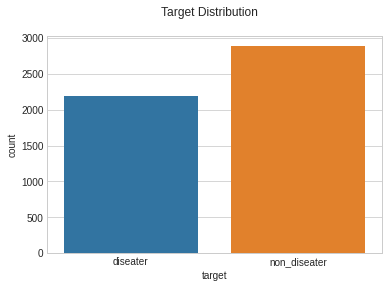

In [101]:
dis_types = ['non_diseater','diseater']
df = train.copy()
df['target'] = train['target'].map(lambda x : dis_types[x])

sns.countplot(x='target', data=df)
plt.suptitle('Target Distribution')
plt.show()

    it maybe an implanced classes but with small ration not affect

### plot top 15 keywords

In [102]:
# keywords value_counts
train['keyword'].value_counts()

collision                36
whirlwind                33
armageddon               32
fatalities               32
flames                   31
                         ..
razed                    10
epicentre                 9
detonation                8
radiation%20emergency     6
inundation                5
Name: keyword, Length: 221, dtype: int64

<Figure size 720x360 with 0 Axes>

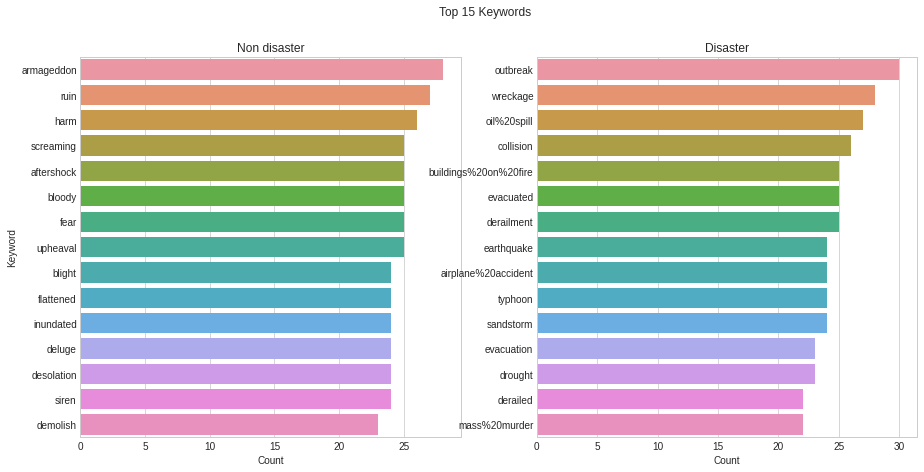

In [103]:
# top 15 keywords

disaster = train[train['target']==1]['keyword'].value_counts()
none_disaster = train[train['target']==0]['keyword'].value_counts()

disaster = disaster[:15]
none_disaster = none_disaster[:15]

plt.figure(figsize=(10, 5))

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(15,7))

sns.barplot(x=none_disaster.values, y=none_disaster.index, ax=ax1)
ax1.set(xlabel='Count', ylabel='Keyword', title='Non disaster')

sns.barplot(x=disaster.values, y=disaster.index, ax=ax2)
ax2.set(xlabel='Count', title='Disaster')

plt.suptitle('Top 15 Keywords')
plt.show()

### top 15 locations

<Figure size 720x360 with 0 Axes>

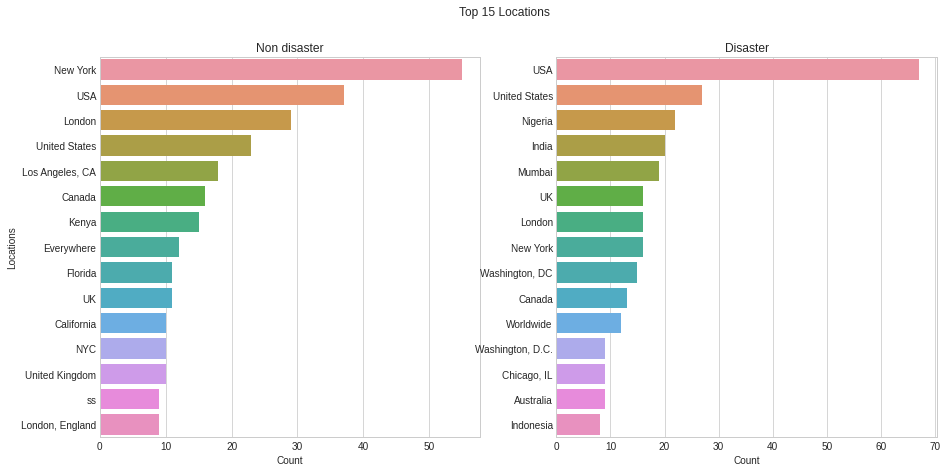

In [104]:
#top 15 locations
disaster = train[train['target']==1]['location'].value_counts()
none_disaster = train[train['target']==0]['location'].value_counts()

disaster = disaster[:15]
none_disaster = none_disaster[:15]

plt.figure(figsize=(10, 5))

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(15,7))

sns.barplot(x=none_disaster.values, y=none_disaster.index, ax=ax1)
ax1.set(xlabel='Count', ylabel='Locations', title='Non disaster')

sns.barplot(x=disaster.values, y=disaster.index, ax=ax2)
ax2.set(xlabel='Count', title='Disaster')

plt.suptitle('Top 15 Locations')
plt.show()

### 7- Most common words

In [105]:
def list_of_words(target):
    corpus = []
    for x in train[train['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    
    return corpus

disaster = list_of_words(1)
non_disaster = list_of_words(0)

In [109]:
len(non_disaster), len(disaster)

(43197, 33454)

In [18]:
# downloading the required nltk package
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> stopwords
Command 'stopwords' unrecognized

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
      Unzipping corpora/stopwords.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

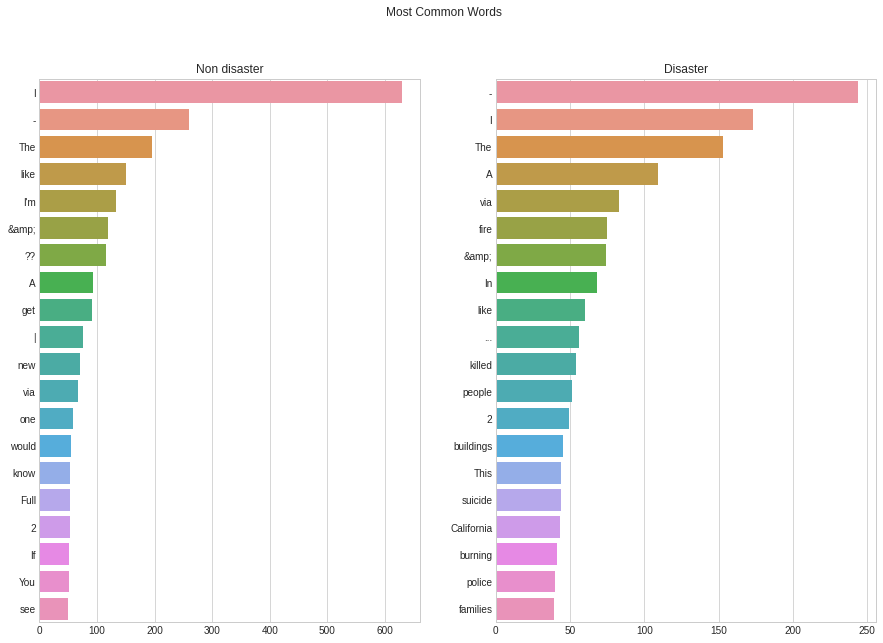

In [110]:
# Most common words

stop_words = stopwords.words('english')
common_words_disaster = []
common_words_nondisaster = []

# extract the most common words for the two classes
for i in disaster:
    if i not in stop_words:
        common_words_disaster.append(i)
        
for i in non_disaster:
    if i not in stop_words:
        common_words_nondisaster.append(i)


# Plotting
counter_disaster = Counter(common_words_disaster)
counter_nondisaster = Counter(common_words_nondisaster)

x_disaster, y_disaster = map(list, zip(*counter_disaster.most_common()[:20]))
x_nondisaster, y_nondisaster = map(list, zip(*counter_nondisaster.most_common()[:20]))

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(15,10))

sns.barplot(x=y_disaster, y=x_disaster, ax=ax2)
ax2.set_title('Disaster')

sns.barplot(x=y_nondisaster, y=x_nondisaster, ax=ax1)
ax1.set_title('Non disaster')

fig.suptitle('Most Common Words')
plt.show()

### 8- Most common stopwords

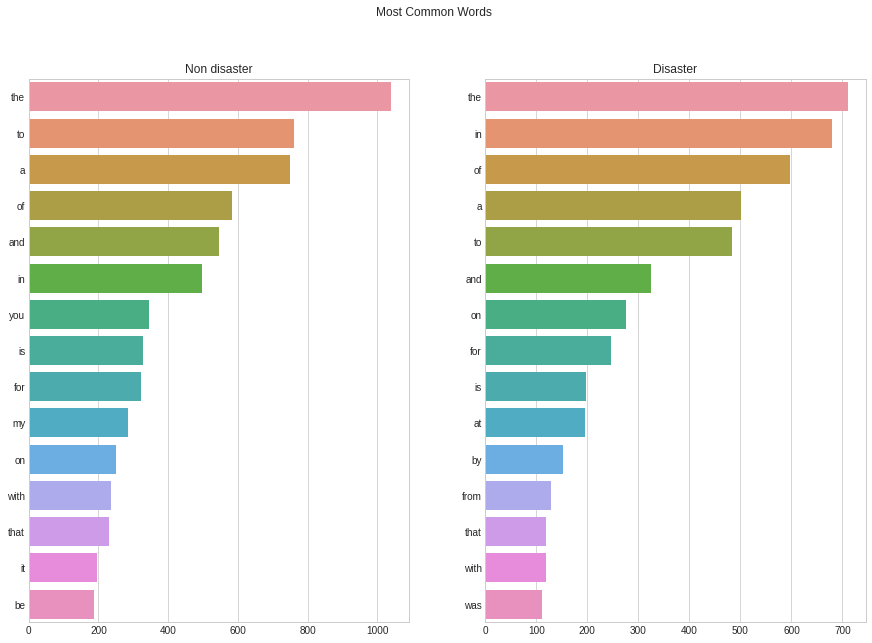

In [118]:
# most common stopwords
stop_words = stopwords.words('english')
stop_words_disaster = []
stop_words_nondisaster = []

# as previous

for i in disaster:
    if i in stop_words:
        stop_words_disaster.append(i)
        
for i in non_disaster:
    if i in stop_words:
        stop_words_nondisaster.append(i)
        
# plotting
counter_disaster = Counter(stop_words_disaster)
counter_nondisaster = Counter(stop_words_nondisaster)

x_disaster, y_disaster = map(list, zip(*counter_disaster.most_common()[:15]))
x_nondisaster, y_nondisaster = map(list, zip(*counter_nondisaster.most_common()[:15]))

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(15,10))

sns.barplot(x=y_disaster, y=x_disaster, ax=ax2)
ax2.set_title('Disaster')

sns.barplot(x=y_nondisaster, y=x_nondisaster, ax=ax1)
ax1.set_title('Non disaster')

fig.suptitle('Most Common Words')
plt.show()

### Prepare the train and test sets

In [171]:
train = pd.read_csv('train.csv', sep=',')
test = pd.read_csv('test.csv', sep=',')

In [172]:
train = train.drop(['keyword','location'], axis=1)
test = test.drop(['keyword','location'], axis=1)

In [200]:
test.head()

,id,text
0,0,Just happened a terrible car crash
1,2,"Heard about #earthquake is different cities, s..."
2,3,"there is a forest fire at spot pond, geese are..."
3,9,Apocalypse lighting. #Spokane #wildfires
4,11,Typhoon Soudelor kills 28 in China and Taiwan


    no target values ?

In [173]:
train.head()

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1


In [174]:
train.isnull().sum()

id        0
text      0
target    0
dtype: int64

In [175]:
# we need to sort values
X_train = train.sort_values(by= ['id'], ascending=True)
X_test = test.sort_values(by= ['id'], ascending=True)

In [176]:
X_train.head()

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1


In [177]:
# convert text to array

X_train = X_train.loc[:,X_train.columns=='text'].values.flatten()

X_test = X_test.loc[:,X_test.columns=='text'].values.flatten()

In [179]:
print(X_train[:2])

['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'
 'Forest fire near La Ronge Sask. Canada']


### Tokenize the data

In [312]:
import tensorflow as tf
import tensorflow.keras as keras 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization, Bidirectional, TimeDistributed

In [181]:
tokenizer = Tokenizer()
def preprocess_text(text):
    '''
    preprocess the text 
    '''
    sequences = tokenizer.fit_on_texts(text)
    return sequences

In [182]:
tokens = preprocess_text(X_train)

In [183]:
tokens

### Convert text to sequences

In [184]:
#text to sequences
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [185]:
X_train[0]

[119, 4633, 24, 4, 868, 8, 21, 263, 138, 1619, 4634, 89, 40]

In [186]:
# padding sequences

X_train = np.array(X_train, dtype=object)
X_test = np.array(X_test, dtype=object)
X_train = keras.preprocessing.sequence.pad_sequences(X_train)
X_test = keras.preprocessing.sequence.pad_sequences(X_test)

In [187]:
# after padding
print(X_train[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0  119 4633   24    4  868    8   21  263
  138 1619 4634   89   40]


In [188]:
# checking the size of the vocabularies

vocab_size = len(tokenizer.word_index)
print(f'Size of the vocabularies: {vocab_size}')

Size of the vocabularies: 22700


### Getting the Testset ready

In [189]:
# labels 
y_train = train.target.values

In [190]:
# 1 for true disaster and 0 otherwise
print(y_train[0])

1


### Split the data

In [191]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

### Structure of LSTM model

### Train the model

In [193]:
# class weights
total = 0
class_weights = []
for i in train['target'].value_counts():
    total += i
class_weights = [1 - (i/total) for i in train['target'].value_counts()]

In [194]:
class_weights

[0.4296597924602653, 0.5703402075397347]

In [195]:
class_weightss= {1:class_weights[0], 0:class_weights[1]}

In [196]:
X_train.shape

(6090, 33)

In [330]:
#create the model
model = Sequential()
model.add(Embedding(input_dim = vocab_size+2, output_dim = 32, name='Embedding'))
model.add(LSTM(128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())



model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=["accuracy"])
# model.summary()

In [331]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger, ReduceLROnPlateau

bs = 64

#Fitting the LSTM to the training set
model.fit(
    X_train,
    y_train,
    class_weight = class_weightss,
    validation_data=(X_val, y_val),  
    steps_per_epoch=X_train.shape[0] // bs, 
    batch_size = bs,
    epochs = 50,
    callbacks=[ReduceLROnPlateau(monitor='val_accuracy',factor=0.5, verbose=1, patience=3,min_lr=0.00001),
                                      ModelCheckpoint("/content/drive/MyDrive/Amit_grad_proj/Lstm_final_proj.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1),
                                      EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=1, mode='auto'),
                                      CSVLogger('/content/drive/MyDrive/Amit_grad_proj/Lstm_final_proj.csv')]
                              )

Epoch 1/50
95/95 [==============================] - ETA: 0s - loss: 0.3665 - accuracy: 0.5946
Epoch 1: val_loss improved from inf to 0.68969, saving model to /content/drive/MyDrive/Amit_grad_proj/Lstm_final_proj.h5
95/95 [==============================] - 11s 91ms/step - loss: 0.3665 - accuracy: 0.5946 - val_loss: 0.6897 - val_accuracy: 0.5706 - lr: 0.0010
Epoch 2/50
95/95 [==============================] - ETA: 0s - loss: 0.2053 - accuracy: 0.8163
Epoch 2: val_loss improved from 0.68969 to 0.66794, saving model to /content/drive/MyDrive/Amit_grad_proj/Lstm_final_proj.h5
95/95 [==============================] - 9s 91ms/step - loss: 0.2053 - accuracy: 0.8163 - val_loss: 0.6679 - val_accuracy: 0.5706 - lr: 0.0010
Epoch 3/50
95/95 [==============================] - ETA: 0s - loss: 0.0947 - accuracy: 0.9275
Epoch 3: val_loss improved from 0.66794 to 0.57601, saving model to /content/drive/MyDrive/Amit_grad_proj/Lstm_final_proj.h5
95/95 [==============================] - 9s 93ms/step - loss

### Evaluate the model

In [335]:
from keras.models import load_model

model = load_model("/content/drive/MyDrive/Amit_grad_proj/Lstm_final_proj.h5", compile=False)
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])



In [336]:
# evaluation
# loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
loss_v, accuracy_v = model.evaluate(X_val, y_val, verbose=1)
loss_t, accuracy_t = model.evaluate(X_train, y_train, verbose=1)
print("ANN Model")
print("Train: accuracy = %f  -  loss = %f" % (accuracy_t, loss_t))
print("Validation: accuracy = %f  -  loss = %f" % (accuracy_v, loss_v))
# print("Test: accuracy = %f  -  loss = %f" % (accuracy, loss))


191/191 [==============================] - 3s 14ms/step - loss: 0.1386 - accuracy: 0.9828
ANN Model
Train: accuracy = 0.982759  -  loss = 0.138626
Validation: accuracy = 0.785949  -  loss = 0.489993


### Making predictions

In [337]:
preds = np.where(model.predict(X_test)>0.5,1.0,0.0).flatten().astype('int32')

In [338]:
results = {'text':test.text, 'target':preds}
df_results = pd.DataFrame(results)
df_results.head()

,text,target
0,Just happened a terrible car crash,0
1,"Heard about #earthquake is different cities, s...",0
2,"there is a forest fire at spot pond, geese are...",1
3,Apocalypse lighting. #Spokane #wildfires,1
4,Typhoon Soudelor kills 28 in China and Taiwan,1


    no ground truth for calc accuracy